Gabriel Marcelino
October 16, 2024
NLP Application


1. Imports and load data


In [80]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk

# read train data from archive/train.csv
train_data = pd.read_csv('archive/train.csv', encoding='ISO-8859-1')

# read test data from archive/testdata.manual.2009.06.14.csv
test_data = pd.read_csv('archive/testdata.manual.2009.06.14.csv')

# display 5 first rows data
print(test_data.head())

   4  3  Mon May 11 03:17:40 UTC 2009  kindle2        tpryan  \
0  4  4  Mon May 11 03:18:03 UTC 2009  kindle2        vcu451   
1  4  5  Mon May 11 03:18:54 UTC 2009  kindle2        chadfu   
2  4  6  Mon May 11 03:19:04 UTC 2009  kindle2         SIX15   
3  4  7  Mon May 11 03:21:41 UTC 2009  kindle2      yamarama   
4  4  8  Mon May 11 03:22:00 UTC 2009  kindle2  GeorgeVHulme   

  @stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.  
0  Reading my kindle2...  Love it... Lee childs i...                                                               
1  Ok, first assesment of the #kindle2 ...it fuck...                                                               
2  @kenburbary You'll love your Kindle2. I've had...                                                               
3  @mikefish  Fair enough. But i have the Kindle2...                                                               
4  @richardebaker no. it is too big

2. Preprocess and Visualize the Data:

Number of positie sentences 8582
Number of negative sentences 7781
Number of neutral sentences  11118


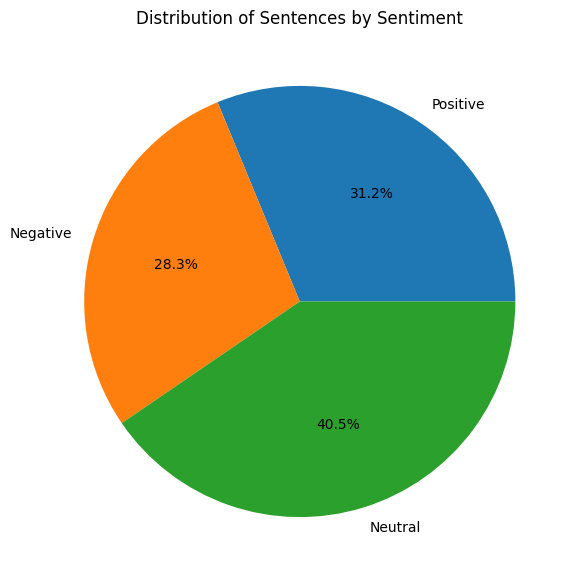

In [81]:
# count the number of positives, negatives and neutral
positives = train_data[train_data['sentiment'] == "positive"]
num_positives = positives.shape[0]
print(f"Number of positie sentences", num_positives)

negatives = train_data[train_data['sentiment'] == 'negative']
num_negatives = negatives.shape[0]
print(f"Number of negative sentences", num_negatives)

neutral = train_data[train_data['sentiment'] == 'neutral']
num_neutral = neutral.shape[0]
print(f"Number of neutral sentences ", num_neutral)
# plot data
sentiment_counts = {'Positive': num_positives, 'Negative': num_negatives, "Neutral": num_neutral}

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Sentences by Sentiment')
plt.show()


3. Prepare data

In [82]:
# Remove punctuation from data
train_data["cleaned_sentence"] = train_data['text'].str.replace('[^\w\s]','', regex = True)
print(train_data["cleaned_sentence"])
# Remove Stop Words

"""Remove stop words (i.e., words that do not add a sentiment).
Assign each word in every text element, with a sentiment score (use TfidVectorizer).
Use a binary classification algorithm (e.g., logistic regression), which you can import from sklearn.
Divide the data into a training set and testing set, with a ratio of 80:20.
Fit the data set using the model.
Compute the (accuracy) score of the model."""

0                        Id have responded if I were going
1               Sooo SAD I will miss you here in San Diego
2                                   my boss is bullying me
3                            what interview leave me alone
4         Sons of  why couldnt they put them on the rel...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     Ive wondered about rake to  The client has ma...
27478     Yay good for both of you Enjoy the break  you...
27479                                But it was worth it  
27480       All this flirting going on  The ATG smiles ...
Name: cleaned_sentence, Length: 27481, dtype: object
